# 円を折れ線近似する関数を準備

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

div_num = 9
def draw_circle_by_polygonal_line(div_num):
    thetas = np.linspace(0, 2 * np.pi, div_num)
    xs = np.cos(thetas)
    ys = np.sin(thetas)

    plt.plot(xs, ys)    
    plt.gca().set_aspect('equal', adjustable='box')

# ベクトルでつないだ折れ線で円を近似する

円周上の点を $n$ 分割し折れ線で分点をつないでいった.
一旦個別に図示している.

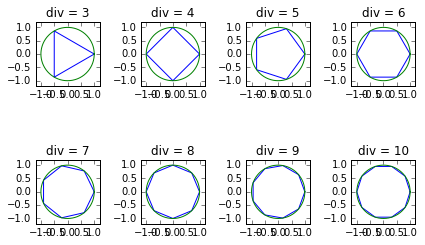

In [11]:
for i in range(4, 12):
    pnum = i - 3
    plt.subplot(2, 4, pnum)
    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])
    plt.title("div = " + str(i-1))
    draw_circle_by_polygonal_line(i)
    draw_circle_by_polygonal_line(1000)
    
plt.tight_layout()

# ベクトルでつないだ折れ線で円を近似する

9 分割までを重ねて 1 つの図にしてみた.

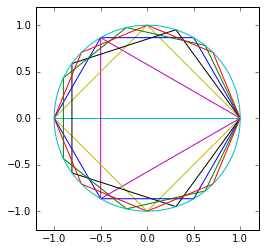

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

for div_num in range(10):
    draw_circle_by_polygonal_line(div_num)

draw_circle_by_polygonal_line(1000)    
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.show()

# アニメーションにしてみる

分割を細かくしていくことで精度が上がる様子をアニメーションで見てみよう.

図の両端にある「+」「-」ボタンでアニメーションのスピードを変えられるので適当に変えて遊んでみよう.

In [2]:
%matplotlib inline
from IPython.display import HTML
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt
#from JSAnimation.IPython_display import display_animation

def circle_data(div_num):
    thetas = np.linspace(0, 2 * np.pi, div_num)
    xs = np.cos(thetas)
    ys = np.sin(thetas)
    return (xs, ys)

# アニメーション用のデータ集
circles = []
for i in range(4, 31):
    circles.append(circle_data(i))

# 大きい方が細かいところまで見えるように 1000 x 1000 サイズにする
#fig = plt.figure(figsize=(10, 10));
fig = plt.figure();

# グラフの軸の設定
ax = plt.axes(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2));
line, = ax.plot([],[],lw=2);

# アスペクト比を等しく
plt.gca().set_aspect('equal', adjustable='box')

def animate(data):
    x = data[0]
    y = data[1]
    line.set_data(x, y)
    return line

anim = animation.FuncAnimation(fig, animate, frames=circles, interval=100)
#display_animation(anim, default_mode='reflect') # -> TypeError: a bytes-like object is required, not 'str'

# See https://ipymd.readthedocs.io/en/latest/_modules/ipymd/plotting/JSAnimation/IPython_display.html
plt.close(anim._fig)
HTML(anim.to_jshtml(default_mode='reflect'))